In [58]:
import os 
os.chdir("C:/Users/hp/Desktop")
os.getcwd()

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')


In [59]:
data = pd.read_csv("AirPassengers.csv")

In [60]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [61]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [62]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [63]:
data['Month'] = pd.to_datetime(data['Month'])

In [64]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [65]:
indexdata = data.set_index("Month")

In [66]:
indexdata.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0,0.5,'Number of passengers')

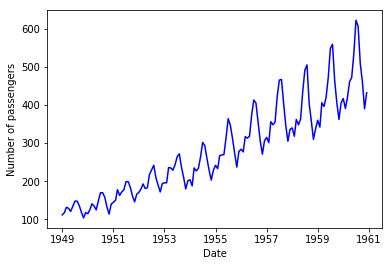

In [67]:
plt.plot(indexdata, color='blue')
plt.xlabel('Date')
plt.ylabel('Number of passengers')

Text(0.5,1,'4 Months Moving Average')

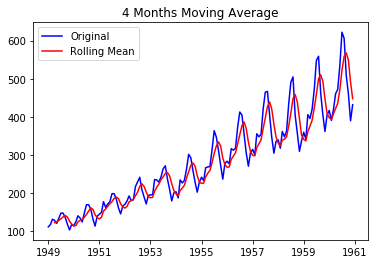

In [68]:
#4 months MA
four_months_moving_average = indexdata.rolling(window=4).mean()
plt.plot(indexdata, color='blue', label='Original')
plt.plot(four_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('4 Months Moving Average')

Text(0.5,1,'6 Months Moving Average')

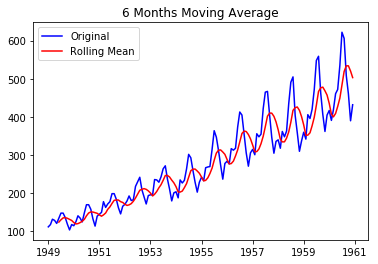

In [69]:
#6 months MA
six_months_moving_average = indexdata.rolling(window=6).mean()
plt.plot(indexdata, color='blue', label='Original')
plt.plot(six_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('6 Months Moving Average')

Text(0.5,1,'8 Months Moving Average')

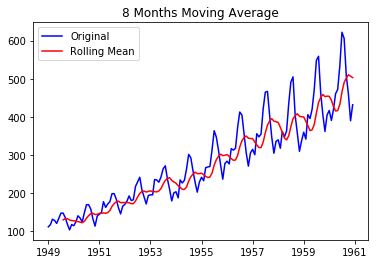

In [70]:
#8 Months MA
eight_months_moving_average = indexdata.rolling(window=8).mean()
plt.plot(indexdata, color='blue', label='Original')
plt.plot(eight_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('8 Months Moving Average')


Text(0.5,1,'12 Months Moving Average')

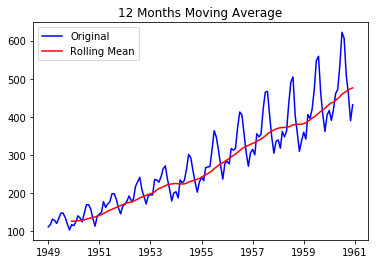

In [71]:
#12 months MA
twelve_months_moving_average = indexdata.rolling(window=12).mean()
plt.plot(indexdata, color='blue', label='Original')
plt.plot(twelve_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('12 Months Moving Average')


In [72]:
#Rolling stats
rolmean = indexdata.rolling(window=12).mean()

Text(0.5,1,'Mean')

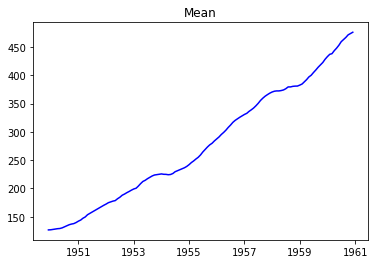

In [73]:
plt.plot(rolmean, 'blue')
plt.title('Mean')

In [74]:
rolstd = indexdata.rolling(window=12).std()

Text(0.5,1,'Standard Deviation')

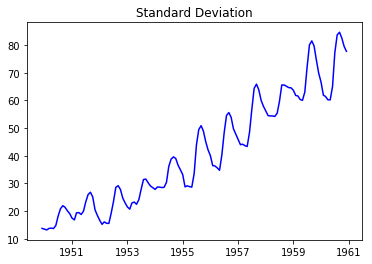

In [75]:
plt.plot(rolstd, 'blue')
plt.title('Standard Deviation')

Text(0.5,1,'Rolling Mean and Standard deviation\n')

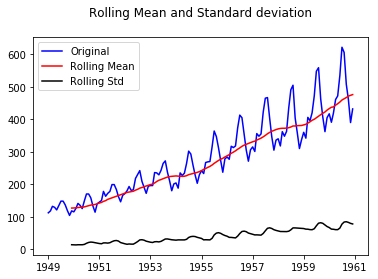

In [76]:
#Plot rolling stats
plt.plot(indexdata, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean and Standard deviation\n')

In [77]:
dftest = adfuller(indexdata['#Passengers'], autolag='AIC')


In [78]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

In [79]:
dfoutput

Test Statistic                   0.815369
p-value                          0.991880
No. of Lags used                13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

In [80]:
def test_stationary(timeseries):
    
    # Rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation\n')
    plt.show(block=False)
    
    # Dickey Fuller test
    print('Results of Dickey Fuller Test:\n')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)


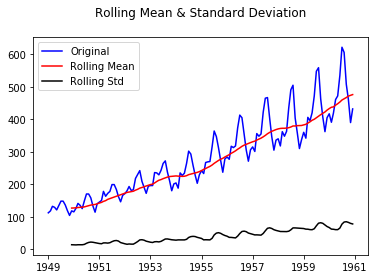

Results of Dickey Fuller Test:

Test Statistic                   0.815369
p-value                          0.991880
No. of Lags used                13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [81]:
test_stationary(indexdata)

In [82]:
indexdata_logScale= np.log(indexdata)

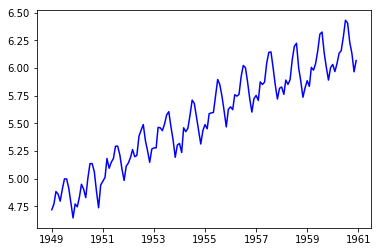

In [83]:
plt.plot(indexdata_logScale, 'blue')

In [84]:
movingAverage = indexdata_logScale.rolling(window=12).mean()
movingSTD = indexdata_logScale.rolling(window=12).std()

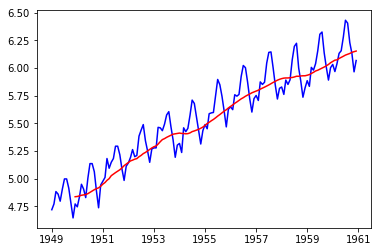

In [85]:
plt.plot(indexdata_logScale, color='blue')
plt.plot(movingAverage, color='red')

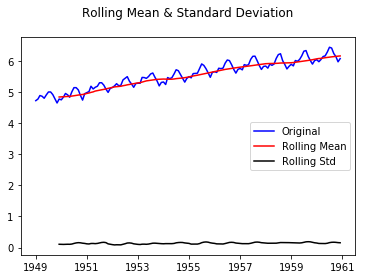

Results of Dickey Fuller Test:

Test Statistic                  -1.717017
p-value                          0.422367
No. of Lags used                13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [86]:
test_stationary(indexdata_logScale)

In [87]:
#Another Transformation
dataLogScaleMinusMovingAverage = indexdata_logScale - movingAverage
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


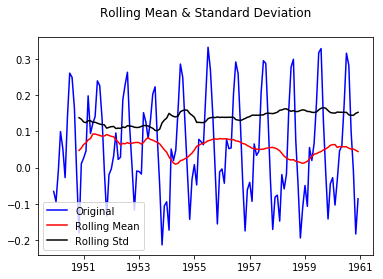

Results of Dickey Fuller Test:

Test Statistic                  -3.162908
p-value                          0.022235
No. of Lags used                13.000000
Number of observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [88]:
test_stationary(dataLogScaleMinusMovingAverage)

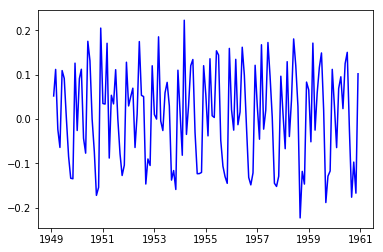

In [89]:
#Differencing

dataLogDiffShifting = indexdata_logScale - indexdata_logScale.shift()
plt.plot(dataLogDiffShifting, color='blue')


In [90]:
dataLogDiffShifting.dropna(inplace=True)

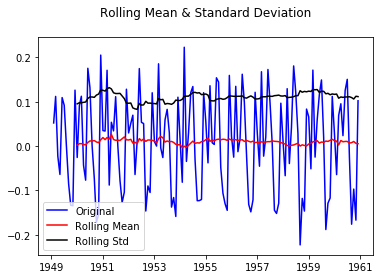

Results of Dickey Fuller Test:

Test Statistic                  -2.717131
p-value                          0.071121
No. of Lags used                14.000000
Number of observations used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [91]:
test_stationary(dataLogDiffShifting)

In [92]:
#Component of TS
decomposition = seasonal_decompose(indexdata_logScale)

In [93]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

Text(0.5,0.98,'Decomposition of multiplicative time series')

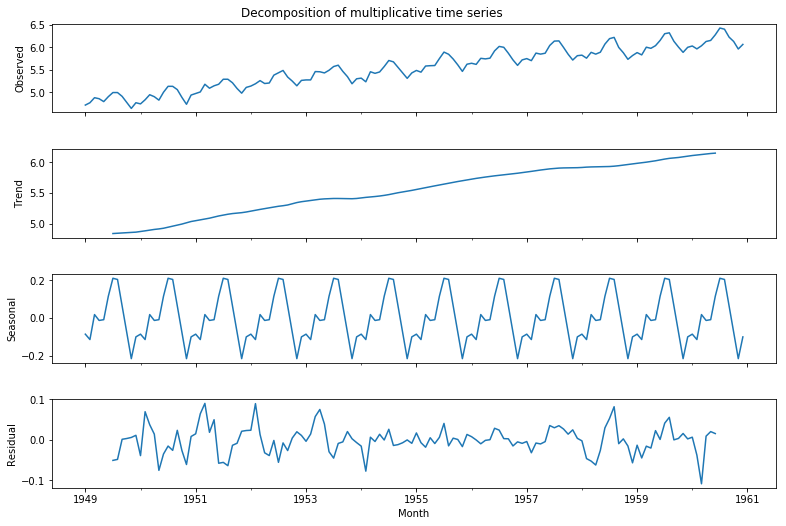

In [94]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
plt.suptitle('Decomposition of multiplicative time series')

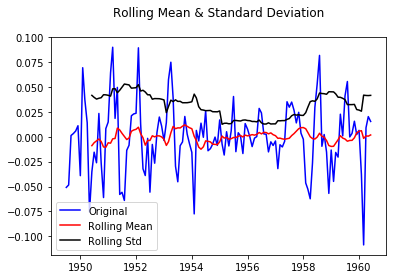

Results of Dickey Fuller Test:

Test Statistic                -6.332387e+00
p-value                        2.885059e-08
No. of Lags used               9.000000e+00
Number of observations used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [95]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

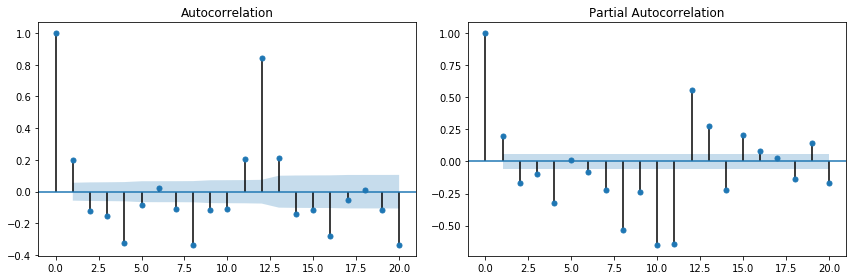

In [96]:
#ACF and PACF
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
plot_acf(dataLogDiffShifting, lags=20, ax=axes[0], alpha=0.5)

plot_pacf(dataLogDiffShifting, lags=20, ax=axes[1], alpha=0.5)
plt.tight_layout()


Plotting ARIMA model


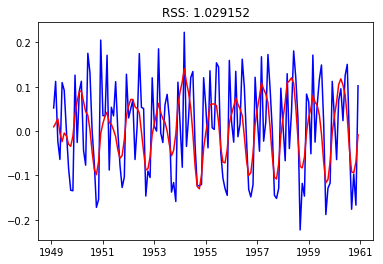

In [97]:
#p = 2, d = 1, q = 2

model = ARIMA(indexdata_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)

plt.plot(dataLogDiffShifting, color='blue')
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_ARIMA.fittedvalues - dataLogDiffShifting['#Passengers'])**2))
print('Plotting ARIMA model')


Plotting ARIMA model


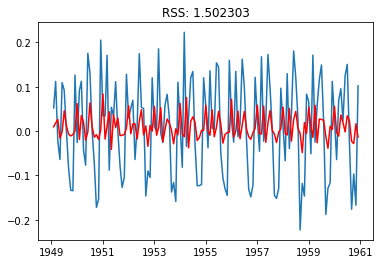

In [98]:
#p = 2, d = 1, q = 0

model = ARIMA(indexdata_logScale, order=(2,1,0))
results_AR = model.fit()
plt.plot(dataLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_AR.fittedvalues - dataLogDiffShifting['#Passengers'])**2))
print('Plotting ARIMA model')

In [99]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

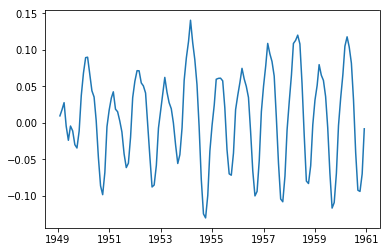

In [100]:
plt.plot(predictions_ARIMA_diff)

In [101]:
#Back to original scale
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [102]:
predictions_ARIMA_log = pd.Series(indexdata_logScale['#Passengers'].ix[0], index=indexdata_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

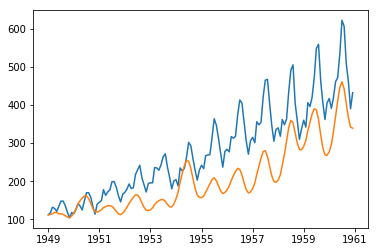

In [103]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexdata)
plt.plot(predictions_ARIMA)